In [2]:
#packages needed 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors

from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

from scipy.optimize import curve_fit
import scipy.stats as stat
from scipy.signal import find_peaks
from scipy.signal import peak_widths



In [3]:
def GetImage(fitfile): 
    '''Takes: .fit file
        Returns: file, data  (n,m) for n rows and m colums, file info '''
    file = get_pkg_data_filename(fitfile)
    image_data = fits.getdata(file, ext = 0)
    return file, image_data, fits.info(file)

    # Plotting
def PlotRings(image_data, title, xlabel, ylabel, invert = True, figsize0 = 'a', figsize1 = 'a'): 
    '''Specifics for Ploting Ring image'''
    # Style
    plt.style.use(astropy_mpl_style)
    # plt.style.use('bmh')
    hfont = {'fontname':'Consolas'}
    if figsize0 and figsize1 == 'a': 
        print('Ratio set to Default:  (12,10)')
        fig, axes = plt.subplots(figsize= (12,10))
    elif figsize0 and figsize1 != 'a': 
        print(f"Ratio override to ({figsize0},{figsize1})")
        fig, axes = plt.subplots(figsize= (figsize0,figsize1))

    #plot
    axes.imshow(image_data, cmap = 'gray', norm= colors.PowerNorm(gamma=0.5))

    #labels 
    axes.set_title(title, **hfont)
    axes.set_ylabel(ylabel, **hfont)
    axes.set_xlabel(xlabel, **hfont)
    if invert == True: 
        plt.gca().invert_yaxis()
    else: 
        plt.gca()

    return  

In [5]:
B0, B0_data, B0_infor =GetImage("AllDataFiles/B0D180.FIT")

Filename: AllDataFiles\B0D180.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (765, 510)   int16 (rescales to uint16)   


Ratio override to (10,8)


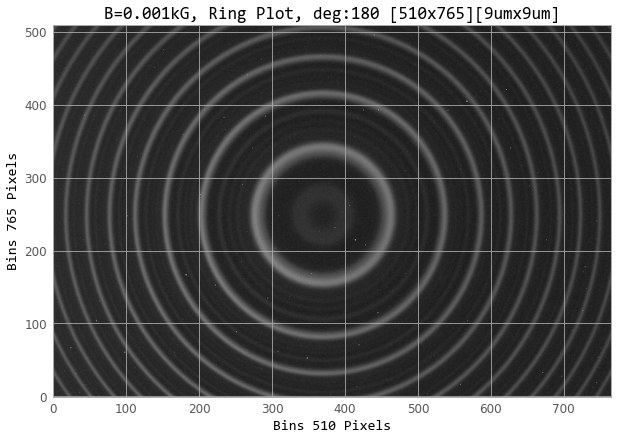

In [10]:
PlotRings(B0_data, 
        "B=0.001kG, Ring Plot, deg:180 [510x765][9umx9um]", 
        'Bins 510 Pixels',
        'Bins 765 Pixels',
        figsize0=10, 
        figsize1=8
        )

plt.savefig("Graphs/B0RingPlot.png", bbox_inches ='tight' )
